<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regressão-Logística" data-toc-modified-id="Regressão-Logística-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Logística</a></span><ul class="toc-item"><li><span><a href="#Lendo-e-Explorando-Dados" data-toc-modified-id="Lendo-e-Explorando-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lendo e Explorando Dados</a></span></li><li><span><a href="#Função--Sigmoidal" data-toc-modified-id="Função--Sigmoidal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Função  Sigmoidal</a></span></li><li><span><a href="#Função-Custo" data-toc-modified-id="Função-Custo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Função Custo</a></span></li><li><span><a href="#Gradiente-Descendente" data-toc-modified-id="Gradiente-Descendente-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gradiente Descendente</a></span><ul class="toc-item"><li><span><a href="#Masked-Arrays" data-toc-modified-id="Masked-Arrays-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Masked Arrays</a></span></li><li><span><a href="#Novo-Gradiente" data-toc-modified-id="Novo-Gradiente-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Novo Gradiente</a></span></li><li><span><a href="#Nova-Função-Custo" data-toc-modified-id="Nova-Função-Custo-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Nova Função Custo</a></span></li><li><span><a href="#Otimizando-Função-Custo" data-toc-modified-id="Otimizando-Função-Custo-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Otimizando Função Custo</a></span></li></ul></li><li><span><a href="#Fronteira-de-Decisão" data-toc-modified-id="Fronteira-de-Decisão-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fronteira de Decisão</a></span></li><li><span><a href="#Medindo-Performance" data-toc-modified-id="Medindo-Performance-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Medindo Performance</a></span></li></ul></li><li><span><a href="#Scikit-Learn" data-toc-modified-id="Scikit-Learn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scikit Learn</a></span><ul class="toc-item"><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Treinando Modelo</a></span></li><li><span><a href="#Avaliando-Modelo" data-toc-modified-id="Avaliando-Modelo-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Avaliando Modelo</a></span></li><li><span><a href="#Aprimorando-Modelo" data-toc-modified-id="Aprimorando-Modelo-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Aprimorando Modelo</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo implementar o algoritmo de Regressão Logística para solução dos problemas propostos no exercício 2 do curso de Machine Learning da Universidade de Stanford. Neste ponto de criação do notebook, as tarefas propostas para este exercício já foram implementadas em ```Octave``` e a ideia é transpassa-los para ```Python``` utilizando, em primeira instância, propriedades de Álgebra Linear através do NumPy e, em um segundo momento, utilizando a biblioteca ```scikit-learn```.

Na primeira parte deste exercício, é proposto um problema de Regressão Logística para prever se um estudante será aprovado ou não em determinada disciplina, tendo em mãos notas históricas de candidatos anteriores que foram aprovados ou reprovados. O dataset contém notas de cada participante em dois exames e, como label, a decisão de aprovação.

## Regressão Logística

Para resolver este problema, será necessário implementar um algoritmo de classificação para determinar a probabilidade de admissão do estudante baseado nos scores de dois exames.

### Lendo e Explorando Dados

In [1]:
# Importando biblioteca
import numpy as np

dataset = np.loadtxt('ex2data1.txt', delimiter=',')

In [2]:
# Verificando atributos
print(f'Dimensões: {dataset.shape}')

Dimensões: (100, 3)


In [3]:
# Primeiras linhas
dataset[:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

Percebe-se que a última coluna, nosso label y, está identificado apena como 0 e 1, sendo:
    - 0: aluno reprovado
    - 1: aluno aprovado

In [4]:
# Visualizando os dados
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Separando os dados
aprovados = dataset[dataset[:, 2] == 1][:, :2]
reprovados = dataset[dataset[:, 2] == 0][:, :2]

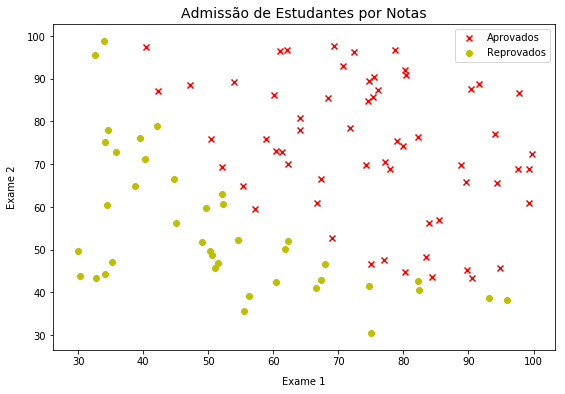

In [6]:
# Plotando dados
fig = plt.figure(figsize=(9, 6))
plt.scatter(aprovados[:, 0], aprovados[:, 1], marker='x', c='r')
plt.scatter(reprovados[:, 0], reprovados[:, 1], marker='o', c='y')
plt.title('Admissão de Estudantes por Notas', size=14)
plt.xlabel('Exame 1', size=10, labelpad=10)
plt.ylabel('Exame 2', size=10, labelpad=10)
plt.legend(['Aprovados', 'Reprovados'])
plt.show()

### Função  Sigmoidal

Antes de darmos continuidade a implementação do algoritmo de classificação, é importante definir, em linhas de código, o cálculo da função sigmoidal que, por sua vez, irá definir se, dada uma entrada de exames, o aluno foi aprovado (com y=1) ou reprovado (com y=0)

\begin{equation*}
h_\theta(x)=g(\theta^Tx)
\end{equation*}

\begin{equation*}
    g(z)=\frac{1}{1+e^{-z}}
\end{equation*}

In [7]:
# Testando
np.exp(0)

1.0

In [8]:
# Testando
np.exp(1e128)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


inf

Fonte: [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html)

In [9]:
# Último teste
1 / (1 + np.exp(0))

0.5

In [10]:
# Definindo função
def sigmoid(z):
    """Função responsável por calcular o resultado sigmoidal, dado o parâmetro z
    Input:
        z: parâmetro z definido por theta.T * x
    Output:
        g(z): função sigmoidal aplicada ao parâmetro z"""
    return 1 / (1 + np.exp(-z))

In [11]:
# Testes
print(f'Função sigmoidal com z = 0 (valor esperado: 0.5): {sigmoid(0)}')
print(f'Função sigmoidal com z = inf (valor esperado: 1): {sigmoid(1e128)}')
print(f'Função sigmoidal com z = -inf (valor esperado: 0): {sigmoid(-1e128)}')

Função sigmoidal com z = 0 (valor esperado: 0.5): 0.5
Função sigmoidal com z = inf (valor esperado: 1): 1.0
Função sigmoidal com z = -inf (valor esperado: 0): 0.0


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


### Função Custo

Após a implementação da função sigmoidal (htheta), precisamos implementar a função custo para verificar se o nosso modelo está caminhando corretamente rumo a otimização. Lembrando que a função custo para Regressão Logística sofreu algumas alterações.

Função Custo Regressão Linear:

\begin{equation*}
    J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 
\end{equation*}

com 
\begin{equation*}
    h_\theta(x)=\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
\end{equation*}

Agora, temos uma diferença na função hypothesis, fazendo com que nossa função custo tome outro shape. Vejamos:

\begin{equation*}
    h_\theta(x) = g(z) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}}
\end{equation*}

Portanto, a função custo agora pode ser escrita como:

\begin{equation*}
    J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\frac{1}{2}(h_\theta(x^{(i)}) - y^{(i)})^2 
              = \frac{1}{m}\sum_{i=1}^{m}Cost(h_\theta(x^{(i)}), y^{(i)})
\end{equation*}

onde

\begin{equation*}
             Cost(h_\theta(x^{(i)}), y^{(i)}) = \frac{1}{2}(h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation*}

Dessa forma, em se tratando de uma Regressão Logística onde os resultados esperados estão localizados entre 0 e 1, é possível calcular o custo de uma previsão como sendo:

\begin{equation*}
Cost(h_\theta(x^{(i)}), y^{(i)}) = \begin{cases} 
                                         -\log(h_\theta(x)), & \mbox{se } y\mbox{ = 1} \\
                                         -\log(1 - h_\theta(x)), & \mbox{se } y\mbox{ = 0}
                                       \end{cases}
\end{equation*}

Fonte de equações LaTeX: [equationsLaTeX](https://kogler.wordpress.com/2008/03/21/latex-multiline-equations-systems-and-matrices/)

Juntando tudo em uma única equação, temos:

\begin{equation*}
             J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_\theta(x^{(i)})-
                      (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})]
\end{equation*}

In [12]:
# Separando dataset
X = dataset[:, :2]
y = dataset[:, -1]

In [13]:
# Verificando
X[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [14]:
# Label
y[:5]

array([0., 0., 0., 1., 1.])

In [15]:
# Adicionando termo bias
m = X.shape[0]
bias = np.ones((m, 1))
X_train = np.column_stack((bias, X))

# Verificando
X_train[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [16]:
# Inicializando parâmetros
n = X_train.shape[1]
theta_inicial = np.zeros((n, 1))
theta_inicial

array([[0.],
       [0.],
       [0.]])

In [17]:
# Calculando z
z = X_train.dot(theta_inicial)

# Verificando
z[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [18]:
# Calculando função sigmoidal
h = sigmoid(z)

# Verificando
h[:5]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

Até agora tudo surtindo como o esperado. Entretando, para realizar as predições, precisamos definir um ```threshold``` no sentido de verificar se a classe predita será 1 (aprovado) ou 0 (reprovado). Inicialmente, vamos manter esse threshold em 0.5, indicando que qualquer hypothesis maior ou igual 0.5 indica alunos aprovados.

In [19]:
# Testando predições
predictions = np.array(([1 if i >= 0.5 else 0 for i in h]))

# Verificando
predictions[:5]

array([1, 1, 1, 1, 1])

Agora que verificamos que nossa função hypothesis está funcionando adequadamente, voltemos a implementação da função custo.

In [20]:
# Testando implementação da função custo
np.log(0.5)

-0.6931471805599453

Fonte: [np.log()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)

\begin{equation*}
             J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_\theta(x^{(i)})-
                      (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})]
\end{equation*}

In [21]:
# Verificando se y precisa de reshape
y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
# Aplicando reshape
y = y.reshape(m, 1)
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [23]:
# Testando
-(y * np.log(h))[:5]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.69314718],
       [0.69314718]])

In [24]:
# Testando
-((1 - y) * np.log((1 - h)))[:5]

array([[0.69314718],
       [0.69314718],
       [0.69314718],
       [0.        ],
       [0.        ]])

In [25]:
# Função custo
sum(-(y * np.log(h))-(1 - y) * np.log((1 - h))) / m

array([0.69314718])

O valor de 0.693 era o esperado, de acordo com o pdf do exercício. Vamos compactar em uma função.

In [26]:
# Definindo função custo
def costFunction(X, y, theta):
    """Função responsável por cálcular o custo J do treinamento, dados os parâmetros
    theta de entrada
    
    Input:
        - X: features do dataset
        - y: labels do dataset (1 = classe positiva, 0 = classe negativa)
        - theta: parâmetros theta
    Output:
        - J: função custo"""
    [m, n] = X.shape
    z = X.dot(theta)
    h = sigmoid(z)
    J = sum(-(y * np.log(h))-(1 - y) * np.log((1 - h))) / m
    
    return J

In [27]:
# Teste final
theta_inicial = np.zeros((n, 1))
costFunction(X_train, y, theta_inicial)

array([0.69314718])

### Gradiente Descendente

Após a implementação da Função Custo, devemos implementar o Gradiente Descendente para encontrar os melhores parâmetros theta que minimizam o custo da nossa função.

\begin{equation*}
    \theta_j:= \theta_j-\alpha\frac{\partial}{\partial \theta_j}J(\theta) 
             = \theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{equation*}

In [28]:
# Calculando para uma única amostra
alpha = 0.03
theta = np.zeros((n, 1))
temp = theta
for i in range(n):
    z = X_train.dot(theta)
    h = sigmoid(z)
    temp[i] = temp[i] - (alpha/m)*sum(X_train[:, i].dot(h-y))
    theta = temp[:]

In [29]:
# Parâmetros foram alterados?
theta

array([[ 0.003     ],
       [ 0.3587995 ],
       [-0.65544313]])

In [30]:
# Será que o custo diminuiu mesmo com 1 iteração?
costFunction(X_train, y, theta)

array([13.42559792])

O custo aumentou... será que isso prevalece ao longo do tempo?

In [31]:
# Verificando com mais iterações
iterations = 20
alpha = 0.03
theta = np.zeros((n, 1))
temp = theta
for i in range(iterations):
    for j in range(n):
        z = X_train.dot(theta)
        h = sigmoid(z)
        temp[j] = temp[j] - (alpha/m)*X_train[:, j].dot(h-y)
        theta = temp[:]

In [32]:
# Parâmetros
theta

array([[-0.04044326],
       [ 0.17684557],
       [ 0.7958092 ]])

In [33]:
# Custo
costFunction(X_train, y, theta)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


array([nan])

Houve um problema. Divisão por 0. Provavelmente houve um erro no log com o primeiro valor do parâmetro theta.

In [34]:
# Verificando com mais iterações
iterations = 200
alpha = 0.03
theta = np.zeros((n, 1))
temp = theta
for i in range(iterations):
    for j in range(n):
        z = X_train.dot(theta)
        h = sigmoid(z)
        temp[j] = temp[j] - (alpha/m)*X_train[:, j].dot(h-y)
        theta = temp[:]

In [35]:
# Parâmetros
theta

array([[-0.47037608],
       [ 0.26357745],
       [ 0.57924756]])

In [36]:
# Custo
costFunction(X_train, y, theta)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


array([nan])

Vamos fazer diferente: debugar a função custo ao longo do aprendizado do gradiente para ver em que ponto isto está ocorrendo.

In [37]:
# Verificando com mais iterações
iterations = 500
alpha = 0.03
theta = np.zeros((n, 1))
temp = theta
J_history = np.zeros((iterations, 1))
for i in range(iterations):
    for j in range(n):
        z = X_train.dot(theta)
        h = sigmoid(z)
        temp[j] = temp[j] - (alpha/m)*X_train[:, j].dot(h-y)
        theta = temp[:]
    J_history[i] = costFunction(X_train, y, theta)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


In [38]:
J_history

array([[13.42559792],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [10.30091921],
       [        nan],
       [        nan],
       [14.74248855],
       [        nan],
       [        nan],
       [        nan],
       [ 8.32780812],
       [        nan],
       [        nan],
       [ 7.80749676],
       [ 3.12285106],
       [        nan],
       [        nan],
       [        nan],
       [ 8.71577657],
       [        nan],
       [        nan],
       [ 7.98733219],
       [        nan],
       [        nan],
       [ 8.42225479],
       [        nan],
       [        nan],
       [10.81994397],
       [        nan],
       [        nan],
       [16.73331729],
       [        nan],
       [        nan],
       [        nan],
       [10.47661607],
       [        nan],
       [        nan],
       [16.31125377],
       [        nan],
       [        nan],
       [        nan],
       [10.40795865],
       [        nan],
       [  

Percebe-se que a função custo não está se comportando da maneira esperada. Parece que ela não está convergindo e, além disso, oscilando muito entre os valores, apresentando, em alguns casos, erro de divisão por zero (nan). Por que será?

Vejamos um exemplo onde obtivemos erro: theta em sua segunda iteração.

In [39]:
# Verificando erro
iterations = 2
alpha = 0.03
theta = np.zeros((n, 1))
temp = theta
J_history = np.zeros((iterations, 1))
for i in range(iterations):
    for j in range(n):
        z = X_train.dot(theta)
        h = sigmoid(z)
        temp[j] = temp[j] - (alpha/m)*X_train[:, j].dot(h-y)
        theta = temp[:]
    J_history[i] = costFunction(X_train, y, theta)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


In [40]:
# Verificando
J_history

array([[13.42559792],
       [        nan]])

Perfeito, vejamos os parâmetros theta que fizeram isso ocorrer.

In [41]:
# Parâmetros
theta

array([[ 0.01812415],
       [ 1.45444813],
       [-1.19795782]])

Função custo:
    - [m, n] = X.shape
    - z = X.dot(theta)
    - h = sigmoid(z)
    - J = sum(-(y * np.log(h))-(1 - y) * np.log((1 - h))) / m

In [42]:
# Primeiro passo
z = X_train.dot(theta)
z[:5]

array([[-43.09385009],
       [ -8.51578175],
       [-35.17743773],
       [-15.84341202],
       [ 24.70775398]])

In [43]:
# Hypothesis
h = sigmoid(z)
h[:5]

array([[1.92565598e-19],
       [2.00242383e-04],
       [5.27998767e-16],
       [1.31611406e-07],
       [1.00000000e+00]])

In [44]:
# Testando log
np.log(h)[:5]

array([[-4.30938501e+01],
       [-8.51598201e+00],
       [-3.51774377e+01],
       [-1.58434122e+01],
       [-1.86020088e-11]])

Já sei! Veja que o quinto exemplo da hypothesis é exatamente 1. Quando fazemos a segunda parte da função custo (1 - h), estamos aplicando um log de ((1 - 1) = 0) e log(0) não existe.

In [45]:
# Verificando
(1 - h)[:5]

array([[1.00000000e+00],
       [9.99799758e-01],
       [1.00000000e+00],
       [9.99999868e-01],
       [1.86020088e-11]])

Provavelmente, por questões de arredondamento (quinto exemplo não é necessáriamente 1 redondo), o valor não deu como o esperado. Mas provavelmente devam haver outros exemplos onde seja impossível aplicar o log.

In [46]:
# Expandindo visualização
np.log((1 - h))[:10]

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([[ 0.00000000e+00],
       [-2.00262434e-04],
       [-5.55111512e-16],
       [-1.31611415e-07],
       [-2.47077515e+01],
       [-1.42645082e-01],
       [-2.48179255e-12],
       [           -inf],
       [-5.97624818e+00],
       [           -inf]])

In [47]:
# Vejamos oitado e décimo exemplos
h[:10]

array([[1.92565598e-19],
       [2.00242383e-04],
       [5.27998767e-16],
       [1.31611406e-07],
       [1.00000000e+00],
       [1.32938250e-01],
       [2.48184305e-12],
       [1.00000000e+00],
       [9.97461668e-01],
       [1.00000000e+00]])

In [48]:
# Quais são os labels oficiais?
y[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]])

Juntando tudo em uma única equação, temos:

\begin{equation*}
             J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_\theta(x^{(i)})-
                      (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})]
\end{equation*}

\begin{equation*}
Cost(h_\theta(x^{(i)}), y^{(i)}) = \begin{cases} 
                                         -\log(h_\theta(x)), & \mbox{se } y\mbox{ = 1} \\
                                         -\log(1 - h_\theta(x)), & \mbox{se } y\mbox{ = 0}
                                       \end{cases}
\end{equation*}

A análise a ser feita, levando em conta especificamente os exemplos de número 8 e 10, onde a função hypothesis realizou uma predição exata (h = 1 e y = 1), temos que, para a segunda parte da função custo, (1 - h) = 0.

Log(0) não existe. Entretanto, temos um fator multiplicando (1 - y) que, aplicado aos exemplos citados, resultaria em 0 (1 - 1), fazendo com que este termo do log obrigatoriamente fosse 0. A dúvida é, como o Python antes calcula o log e, já nesse ponto um erro é retornado, será que a multiplicação por 0 é realmente efetiva? O que estou querendo dizer é: 0 * inf = 0?

#### Masked Arrays

In [49]:
# Testando
0 * np.log(0)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


nan

Segundo alguns fóruns, é possível driblar este problema utilizando ```masked arrays```.

Fonte: [error_divided_by_0_in_log](https://stackoverflow.com/questions/21752989/numpy-efficiently-avoid-0s-when-taking-logmatrix)

In [50]:
# Ajuda
help(np.ma)

Help on package numpy.ma in numpy:

NAME
    numpy.ma

DESCRIPTION
    Masked Arrays
    
    Arrays sometimes contain invalid or missing data.  When doing operations
    on such arrays, we wish to suppress invalid values, which is the purpose masked
    arrays fulfill (an example of typical use is given below).
    
    For example, examine the following array:
    
    >>> x = np.array([2, 1, 3, np.nan, 5, 2, 3, np.nan])
    
    When we try to calculate the mean of the data, the result is undetermined:
    
    >>> np.mean(x)
    nan
    
    The mean is calculated using roughly ``np.sum(x)/len(x)``, but since
    any number added to ``NaN`` [1]_ produces ``NaN``, this doesn't work.  Enter
    masked arrays:
    
    >>> m = np.ma.masked_array(x, np.isnan(x))
    >>> m
    masked_array(data = [2.0 1.0 3.0 -- 5.0 2.0 3.0 --],
          mask = [False False False  True False False False  True],
          fill_value=1e+20)
    
    Here, we construct a masked array that suppress all ``N

[numpy.ma](https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html)

In [51]:
# Realizando alguns testes reais
np.log((1 - h))[:10]

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([[ 0.00000000e+00],
       [-2.00262434e-04],
       [-5.55111512e-16],
       [-1.31611415e-07],
       [-2.47077515e+01],
       [-1.42645082e-01],
       [-2.48179255e-12],
       [           -inf],
       [-5.97624818e+00],
       [           -inf]])

In [52]:
# Multiplicando por 0
teste = 0 * np.log((1 - h))[:10]
teste

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


array([[ 0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [nan],
       [-0.],
       [nan]])

In [53]:
# Aplicando máscara
mask = np.ma.masked_array(teste, np.isnan(teste))
mask

masked_array(
  data=[[0.0],
        [-0.0],
        [-0.0],
        [-0.0],
        [-0.0],
        [-0.0],
        [-0.0],
        [--],
        [-0.0],
        [--]],
  mask=[[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True]],
  fill_value=1e+20)

In [54]:
# Soma de array sem máscara
sum(teste)

array([nan])

In [55]:
# Soma de array com máscara
sum(mask)

masked_array(data=[--],
             mask=[ True],
       fill_value=1e+20,
            dtype=float64)

In [56]:
# Vejamos se isso se aplica a função custo
sum(-(y * np.log(h))-(1 - y) * np.log((1 - h))) / m

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


array([nan])

In [57]:
# Antes da soma
-(y * np.log(h))-(1 - y) * np.log((1 - h))

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


array([[0.00000000e+00],
       [2.00262434e-04],
       [5.55111512e-16],
       [1.58434122e+01],
       [1.86020088e-11],
       [1.42645082e-01],
       [2.67220197e+01],
       [           nan],
       [2.54155884e-03],
       [           nan],
       [           inf],
       [           inf],
       [6.21058760e-13],
       [1.61575512e+01],
       [2.66453526e-15],
       [2.83504231e+01],
       [           nan],
       [           inf],
       [8.53136458e+00],
       [           nan],
       [           inf],
       [           nan],
       [1.49911511e+01],
       [4.06103494e-02],
       [4.50750548e-14],
       [1.12929927e-03],
       [           nan],
       [           inf],
       [2.97428676e+01],
       [4.92256791e-10],
       [1.18798575e-01],
       [           nan],
       [7.88416683e-01],
       [7.46274652e+00],
       [2.49844589e-12],
       [1.69320181e+01],
       [0.00000000e+00],
       [3.59214418e+00],
       [           inf],
       [0.00000000e+00],


In [58]:
# Aplicando máscara
pre_sum = -(y * np.log(h))-(1 - y) * np.log((1 - h))
mask_nan = np.ma.masked_array(pre_sum, np.isnan(pre_sum))
mask_nan_inf = np.ma.masked_array(mask_nan, np.isinf(mask_nan))

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [59]:
# Testando
mask_nan_inf

masked_array(
  data=[[0.0],
        [0.00020026243405591986],
        [5.551115123125785e-16],
        [15.843412150482422],
        [1.860200882237244e-11],
        [0.14264508219747862],
        [26.722019667641288],
        [--],
        [0.0025415588360423714],
        [--],
        [--],
        [--],
        [6.210587599755054e-13],
        [16.157551174922464],
        [2.6645352591003792e-15],
        [28.350423066440204],
        [--],
        [--],
        [8.53136457799871],
        [--],
        [--],
        [--],
        [14.991151069880303],
        [0.040610349359428755],
        [4.507505479978237e-14],
        [0.0011292992718599443],
        [--],
        [--],
        [29.742867594453912],
        [4.922567910060957e-10],
        [0.11879857546714502],
        [--],
        [0.7884166832028598],
        [7.462746516243617],
        [2.4984458946195736e-12],
        [16.932018136754394],
        [0.0],
        [3.592144180650702],
        [--],
        [0.0],
      

In [60]:
# É possível calcular a soma?
sum(mask_nan_inf) / m

masked_array(data=[--],
             mask=[ True],
       fill_value=1e+20,
            dtype=float64)

In [61]:
# Definindo nova função custo
def maskedCostFunction(X, y, theta):
    """Função responsável por cálcular o custo J do treinamento, dados os parâmetros
    theta de entrada
    
    Input:
        - X: features do dataset
        - y: labels do dataset (1 = classe positiva, 0 = classe negativa)
        - theta: parâmetros theta
    Output:
        - J: função custo"""
    [m, n] = X.shape
    z = X.dot(theta)
    h = sigmoid(z)
    pre_sum = -(y * np.log(h))-(1 - y) * np.log((1 - h))
    mask_nan = np.ma.masked_array(pre_sum, np.isnan(pre_sum))
    mask_nan_inf = np.ma.masked_array(mask_nan, np.isinf(mask_nan))
    J = sum(mask_nan_inf) / m
    return J

In [62]:
# Testando gradiente
iterations = 500
alpha = 0.03
theta = np.zeros((n, 1))
temp = theta
J_history = np.zeros((iterations, 1))
for i in range(iterations):
    for j in range(n):
        z = X_train.dot(theta)
        h = sigmoid(z)
        temp[j] = temp[j] - (alpha/m)*X_train[:, j].dot(h-y)
        theta = temp[:]
    J_history[i] = maskedCostFunction(X_train, y, theta)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


In [63]:
# Verificando
J_history

array([[ 13.42559792],
       [ 42.70827716],
       [  7.02927458],
       [ 22.62040971],
       [  0.        ],
       [ 10.30091921],
       [ 20.02883638],
       [  0.        ],
       [ 14.74248855],
       [ 13.75128447],
       [ 43.50684151],
       [  0.        ],
       [  8.32780812],
       [ 12.45515481],
       [  0.        ],
       [  7.80749676],
       [  3.12285106],
       [  3.76714713],
       [ 28.49196836],
       [  0.        ],
       [  8.71577657],
       [ 17.01606142],
       [  0.        ],
       [  7.98733219],
       [ 16.77940645],
       [  0.        ],
       [  8.42225479],
       [ 18.39223691],
       [  0.        ],
       [ 10.81994397],
       [  5.96005691],
       [ 95.01282974],
       [ 16.73331729],
       [ 20.89704924],
       [ 20.5265247 ],
       [  0.        ],
       [ 10.47661607],
       [  6.14976036],
       [ 93.45290064],
       [ 16.31125377],
       [ 19.8373205 ],
       [ 21.1240314 ],
       [  0.        ],
       [ 10

Mesmo aplicando os procedimentos do ```masked array```, a função custo ainda está oscilando.

#### Novo Gradiente

Aplicando gradiente de forma vetorizada para tentar evitar estes erros.

In [64]:
# Testando
(X_train.T.dot(sigmoid(X_train.dot(theta)) - y)) / m

array([[ -0.39102859],
       [-35.78965817],
       [-27.78077346]])

In [65]:
# Testando para uma iteração
z = X_train.dot(theta)
h = sigmoid(z)
theta = (X_train.T.dot(h - y)) / m
theta

array([[ -0.39102859],
       [-35.78965817],
       [-27.78077346]])

In [66]:
h.shape

(100, 1)

In [67]:
X_train.T.dot(h - y).shape

(3, 1)

In [68]:
# Custo
costFunction(X_train, y, theta)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


array([nan])

In [69]:
def newGradient(X, y, theta):
    """Calcula a função gradiente de forma vetorizada
    Input:
        - X: features
        - y: labels
        - theta: parâmetros
    Output:
        - new_theta: parâmetros atualizados"""
    z = X_train.dot(theta)
    h = sigmoid(z)
    new_theta = (X_train.T.dot(h - y)) / m
    return new_theta

O problema realmente está na função custo. Vamos tentar redefinir.

#### Nova Função Custo

In [70]:
# Organizando função custo
def newCostFunction(theta, X, y):
    [m, n] = X_train.shape
    h = sigmoid(X_train.dot(theta))
    termo1 = np.log(h).T.dot(-y)
    termo2 = np.log(1 - h).T.dot(1 - y)
    J = ((termo1 - termo2) / m).flatten()
    return J

Após algumas pesquisas, a conclusão que se chega é de que realmente não há a possibilidade de realizar os cálculos por vias normais. É necessário implementar uma função de otimização para retornar os melhores parâmetros theta que se enquadram nos modelos. 

Pesquisando, foi possível identificar um método no pacote ```scipy```. Vamos realizar alguns testes. 

Fonte:[scipy.optimize.fmin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html)

#### Otimizando Função Custo

In [71]:
# Importando bibliotecas
import scipy.optimize, scipy.special

In [72]:
# Realizando alguns testes
theta = np.zeros((n, 1))
result = scipy.optimize.fmin(newCostFunction, x0=theta, args=(X_train, y),
                             maxiter=500, full_output=True)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


Os pacotes prontos são realmente maravilhosos. Encontramos o mínimo da função custo rapidamente. Vejamos como retornar os parâmetros.

In [73]:
# O que é result?
result

(array([-25.16130062,   0.20623142,   0.20147143]),
 0.2034977015902151,
 157,
 287,
 0)

In [74]:
# Melhores parâmetros
best_theta = result[0]
best_theta

array([-25.16130062,   0.20623142,   0.20147143])

In [75]:
# Custo mínimo
min_cost = result[1]
min_cost

0.2034977015902151

### Fronteira de Decisão

Após retornar os melhores parâmetros, vamos realizar predições e plotar a fronteira de decisão obtida.

In [76]:
# Realizando predições
z = X_train.dot(best_theta)
h = sigmoid(z)
h[:5]

array([9.10345671e-02, 4.22594049e-05, 4.39092181e-02, 9.90424725e-01,
       9.98198751e-01])

In [77]:
min(X[:, 1]), max(X[:, 1])

(30.60326323428011, 98.86943574220611)

In [78]:
plot_x = np.array( [min(X[:,1]), max(X[:,1])] )
plot_y = (-1./ best_theta[2]) * (best_theta[1] * plot_x + best_theta[0])
plot_y

array([93.5613863 , 23.68234763])

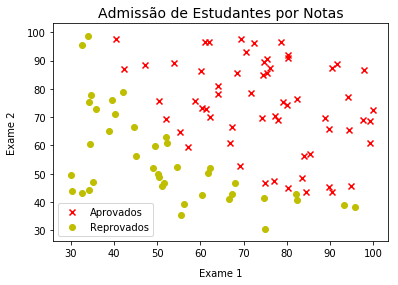

In [79]:
# Plotando dados novamente
fig = plt.figure(figsize=(6, 4))
plt.scatter(aprovados[:, 0], aprovados[:, 1], marker='x', c='r')
plt.scatter(reprovados[:, 0], reprovados[:, 1], marker='o', c='y')
plt.title('Admissão de Estudantes por Notas', size=14)
plt.xlabel('Exame 1', size=10, labelpad=10)
plt.ylabel('Exame 2', size=10, labelpad=10)
plt.legend(['Aprovados', 'Reprovados'])
plt.show()

Precisamos plotar a reta definida pelos nossos parâmetros theta encontrados no treinamento. Esta reta é a reta que melhor divide os nossos dados.

In [80]:
# Melhores parâmetros
best_theta

array([-25.16130062,   0.20623142,   0.20147143])

In [81]:
np.array([min(X[:, 1]), max(X[:, 1])])

array([30.60326323, 98.86943574])

In [82]:
(-1./ best_theta[2]) * (best_theta[1] * plot_x + best_theta[0])

array([93.5613863 , 23.68234763])

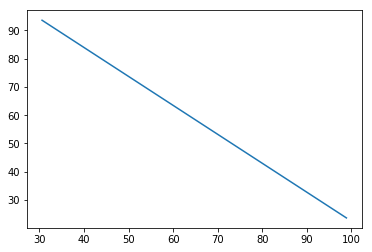

In [83]:
# Verificando plotagem
eixo_x = np.array([min(X[:, 1]), max(X[:, 1])])
eixo_y = (-1./ best_theta[2]) * (best_theta[1] * plot_x + best_theta[0])
plt.plot(eixo_x, eixo_y)

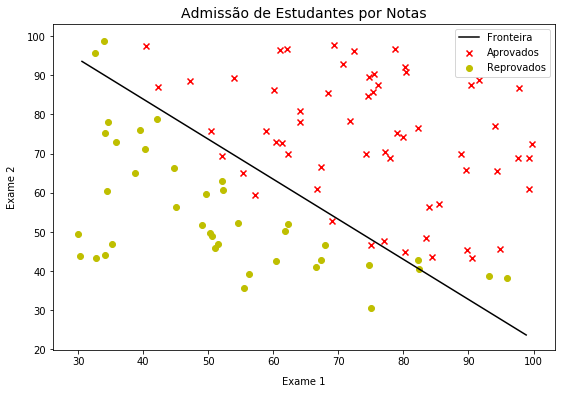

In [84]:
# Plotagem de dados com Fronteira de Decisão
fig = plt.figure(figsize=(9, 6))
plt.scatter(aprovados[:, 0], aprovados[:, 1], marker='x', c='r')
plt.scatter(reprovados[:, 0], reprovados[:, 1], marker='o', c='y')
plt.plot(eixo_x, eixo_y, c='black')
plt.title('Admissão de Estudantes por Notas', size=14)
plt.xlabel('Exame 1', size=10, labelpad=10)
plt.ylabel('Exame 2', size=10, labelpad=10)
plt.legend(['Fronteira', 'Aprovados', 'Reprovados'])
plt.show()

Qual a probabilidade de aprovação de um aluno que tirou 45 no primeiro exame e 85 no segundo exame?

In [85]:
# Predizendo
test = np.array([1, 45, 85])
z = test.dot(best_theta)
h = sigmoid(z)
print(f'A probabilidade desse aluno ser aprovado é de: {h*100:.2f}%')

A probabilidade desse aluno ser aprovado é de: 77.63%


### Medindo Performance

Após toda a luta até o momento, precisamos, de fato, avaliar o trabalho realizado através da medição de performance do modelo. Para isso, vamos medir a acurácia do modelo nos próprios dados de treino.

Antes disso, precisamos implementar uma função de predição que retorne apenas 0 e 1 de acordo com um threshold.

In [86]:
# Predizendo dados
z = X_train.dot(best_theta)
h = sigmoid(z)
h[:5]

array([9.10345671e-02, 4.22594049e-05, 4.39092181e-02, 9.90424725e-01,
       9.98198751e-01])

Existem dois métodos de fazer isso:
    - 1: iterar em todos os exemplos e alterar os valores individualmente
    - 2: procurar um método de fazer isso de forma automática (ainda desconhecido)

In [87]:
# Testando métodos computacionalmente melhores (opção 2)
h >= 0.5

array([False, False, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True])

In [88]:
# Multiplicando por 1 será que funciona?
(h >= 0.5) * 1

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [89]:
# Será que deu certo? Comparando com o original
print(f'Teste: {((h>=0.5)*1)[:10]}')
print(f'Original: {h[:10]}')

Teste: [0 0 0 1 1 0 1 0 1 1]
Original: [9.10345671e-02 4.22594049e-05 4.39092181e-02 9.90424725e-01
 9.98198751e-01 1.07976288e-02 9.98978140e-01 4.23227725e-01
 9.99710020e-01 7.35388214e-01]


Aparentemente deu certo!

In [90]:
# Formalizando predições
z = X_train.dot(best_theta)
h = sigmoid(z)
predictions = ((h>=0.5)*1).reshape(m, 1)

In [91]:
# Verificando
predictions[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [92]:
# Vamos retornar os elementos cuja predição diferiu do label
errors = (predictions != y) * 1
errors[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [93]:
# Contabilizando
sum(errors)

array([11])

In [94]:
# Performance
total_errors = sum(errors)[0]
performance = 1 - (total_errors / m)
print(f'O algoritmo obteve uma taxa de acerto de {performance*100:.2f}%')

O algoritmo obteve uma taxa de acerto de 89.00%


__Conclusão__:

Durante a implementação do modelo de Regressão Logística, foram encontrados diversos obstáculos de cunho matemático, sendo estes oriundos de limites envolvendo funções logaritmicas e de otimização. Em um dos momentos mais críticos da construção do modelo, foi possível entender o problema ocorrido na função custo envolvendo o cálculo de um log de 0. Após isso, pesquisas foram realizadas de modo a buscar funções prontas para otimização, evitando assim os problemas matemáticos.

A função de otimização ```scipy.optmize.fmin``` realmente solucionou todos os problemas, retornando, de uma única vez, os melhores parâmetros theta e menor custo possível do modelo. Para executá-la, precisamos fornecer uma função para ser minimizada (função custo, no caso), além dos dados e do palpite inicial de parâmetros theta.

## Scikit Learn

Após a implementação na raça, vamos utilizar as funcionalidades do ```scikit-learn``` para comparação.

In [95]:
# Importando bibliotecas
import pandas as pd

data = pd.read_csv('ex2data1.txt', names=['exame1', 'exame2', 'resultado'])
data.head()

,exame1,exame2,resultado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [96]:
# Dados nulos
data.isnull().any()

exame1       False
exame2       False
resultado    False
dtype: bool

In [97]:
# Separando dados
X = data.iloc[:, :2]
y = data.iloc[:, -1]

In [98]:
# Dimensões
X.shape

(100, 2)

In [99]:
# Tipos primitivos
X.dtypes

exame1    float64
exame2    float64
dtype: object

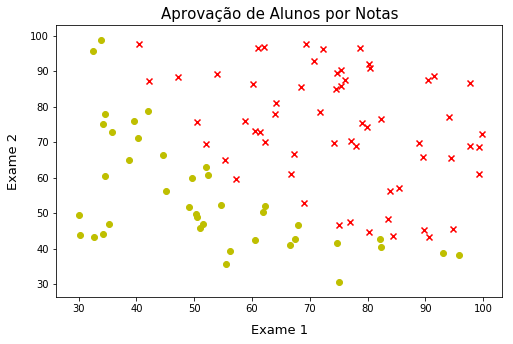

In [100]:
# Plotando dados
aprovados = data[data.iloc[:, 2] == 1].iloc[:, :2]
reprovados = data[data.iloc[:, 2] == 0].iloc[:, :2]
fig = plt.figure(figsize=(8, 5))
plt.scatter(aprovados.iloc[:, 0], aprovados.iloc[:, 1], marker='x', c='r')
plt.scatter(reprovados.iloc[:, 0], reprovados.iloc[:, 1], marker='o', c='y')
plt.title('Aprovação de Alunos por Notas', size=15)
plt.xlabel('Exame 1', size=13, labelpad=10)
plt.ylabel('Exame 2', size=13, labelpad=10)
plt.show()

### Treinando Modelo

In [101]:
# Importando biblioteca
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
# Será que os parâmetros foram os mesmos?
log_reg.coef_, log_reg.intercept_

(array([[0.03844482, 0.03101855]]), array([-3.89977794]))

In [103]:
# Comparando com os obtidos anteriormente
best_theta

array([-25.16130062,   0.20623142,   0.20147143])

Substancialmente diferentes. Vamos plotar a fronteira de decisão para verificar essa desigualdade.

In [104]:
theta_log = np.append(log_reg.intercept_, np.array(log_reg.coef_[0]))
theta_log

array([-3.89977794,  0.03844482,  0.03101855])

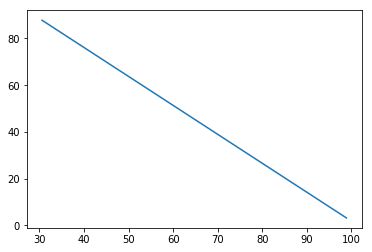

In [105]:
# Verificando plotagem
eixo_x = np.array([min(X.iloc[:, 1]), max(X.iloc[:, 1])])
eixo_y = (-1./ theta_log[2]) * (theta_log[1] * plot_x + theta_log[0])
plt.plot(eixo_x, eixo_y)

Parece bem semelhante, por incrível que pareça.

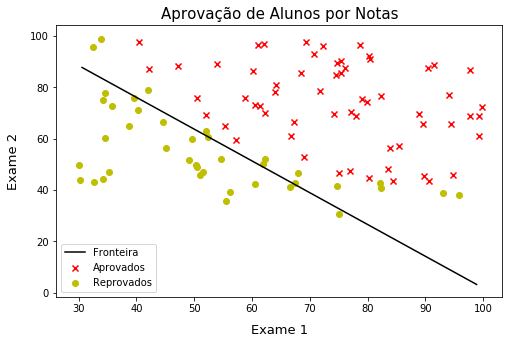

In [106]:
# Plotando dados
aprovados = data[data.iloc[:, 2] == 1].iloc[:, :2]
reprovados = data[data.iloc[:, 2] == 0].iloc[:, :2]
fig = plt.figure(figsize=(8, 5))
plt.scatter(aprovados.iloc[:, 0], aprovados.iloc[:, 1], marker='x', c='r')
plt.scatter(reprovados.iloc[:, 0], reprovados.iloc[:, 1], marker='o', c='y')
plt.plot(eixo_x, eixo_y, c='black')
plt.title('Aprovação de Alunos por Notas', size=15)
plt.xlabel('Exame 1', size=13, labelpad=10)
plt.ylabel('Exame 2', size=13, labelpad=10)
plt.legend(['Fronteira', 'Aprovados', 'Reprovados'])
plt.show()

Visualmente, me parece que o modelo implementado na mão obteve uma performance melhor do que o modelo treinado pela classe Logistic Regression. Vamos trazer essa visão em números.

### Avaliando Modelo

In [107]:
# Avaliando modelo treinado
acc = log_reg.score(X, y)
print(f'O modelo treinado por Regressão Logística obteve acurácia de {acc*100:.2f}%')

O modelo treinado por Regressão Logística obteve acurácia de 87.00%


As suspeitas foram confirmadas: uma queda de 2% de acurácia. Será que isso poderia ser melhorado?

In [108]:
help(LogisticRegression.predict_proba)

Help on function predict_proba in module sklearn.linear_model.logistic:

predict_proba(self, X)
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.



Vamos verificar a probabilidade do aluno testado na primeira parte do exercício em ser aprovado.

In [109]:
# Retomando teste
test

array([ 1, 45, 85])

In [110]:
# Adaptando
X_test = test[1:].reshape(1, -1)
X_test

array([[45, 85]])

In [111]:
# Predizendo probabilidade
prob = log_reg.predict_proba(X_test)
prob

array([[0.38537034, 0.61462966]])

In [112]:
# Comunicando
print(f'Aluno com notas 45 em E1 e 85 em E2 tem {prob[0][1]*100:.2f}% de chance \
de ser aprovado')

Aluno com notas 45 em E1 e 85 em E2 tem 61.46% de chance de ser aprovado


Ele ainda seria dado como aprovado caso o threshold se mantesse em 0.5, porém podemos ver que a probabilidade de aprovação decresceu com relação ao modelo previamente treinado na mão.

### Aprimorando Modelo

In [113]:
# Verificando parâmetro
log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Percebe-se que o hiperparâmetro ```max_iter``` foi automaticamente designado como sendo 100. Vimos, anteriormente, que a otimização da função custo através do ```scipy``` retornou um número de ```max_iter=150```. 

Antes de tentar qualquer otimização mais abrupta, vamos apenas aumentar o número de max_iter e verificar se o modelo performa melhor.

In [114]:
# Tentativa 2
log_reg_2 = LogisticRegression(max_iter=200)
log_reg_2.fit(X, y)
prob_2 = log_reg.predict_proba(X_test)

print(f'Acurácia: {log_reg_2.score(X, y)}')
print(f'Prob de teste: {prob_2}')

Acurácia: 0.87
Prob de teste: [[0.38537034 0.61462966]]


Nada mudou, vamos aplicar o ```GridSearchCV```.

In [115]:
# Buscando a melhor combinação para LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definindo parâmetros
param_grid = [
    {'penalty':['l2'], 'C': [0.1, .2, .4, .6, .8, 1.]
    ,'solver':['lbfgs', 'liblinear']}
]

log_reg_grid = LogisticRegression()
grid_search = GridSearchCV(log_reg_grid, param_grid)
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l2'], 'C': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0], 'solver': ['lbfgs', 'liblinear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [116]:
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
# Acurácia
grid_search.score(X, y)

0.89

In [118]:
# Probabilidades
grid_search.predict_proba(X_test)

array([[0.23307805, 0.76692195]])

Perfeito!

In [119]:
# Comparando hiperparâmetros
log_reg_2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

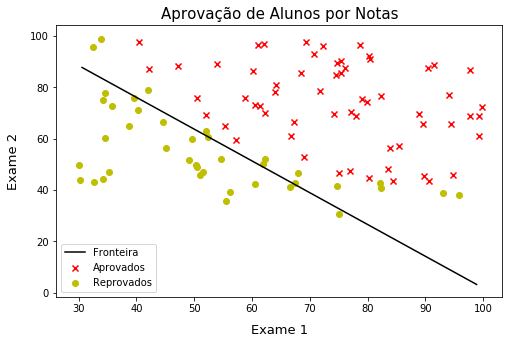

In [120]:
# Plotando fronteira de decisão antiga
aprovados = data[data.iloc[:, 2] == 1].iloc[:, :2]
reprovados = data[data.iloc[:, 2] == 0].iloc[:, :2]
fig = plt.figure(figsize=(8, 5))
plt.scatter(aprovados.iloc[:, 0], aprovados.iloc[:, 1], marker='x', c='r')
plt.scatter(reprovados.iloc[:, 0], reprovados.iloc[:, 1], marker='o', c='y')
plt.plot(eixo_x, eixo_y, c='black')
plt.title('Aprovação de Alunos por Notas', size=15)
plt.xlabel('Exame 1', size=13, labelpad=10)
plt.ylabel('Exame 2', size=13, labelpad=10)
plt.legend(['Fronteira', 'Aprovados', 'Reprovados'])
plt.show()

In [121]:
# Treinando modelo para retornar os melhores parâmetros
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X, y)
best_log_theta = np.append(best_log_reg.intercept_, np.array(best_log_reg.coef_))

print(f'Acurácia do modelo: {best_log_reg.score(X, y)}')
print(f'Melhores parâmetros: {best_log_theta}')
print(f'Theta obtido na raça: {best_theta}')

Acurácia do modelo: 0.89
Melhores parâmetros: [-24.15672439   0.19816012   0.19330036]
Theta obtido na raça: [-25.16130062   0.20623142   0.20147143]


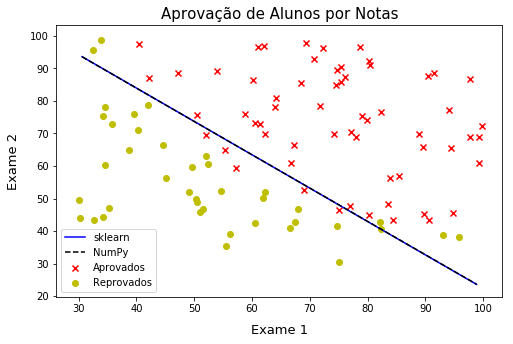

In [122]:
# Plotando nova fronteira para dados do sklearn
eixo_x = np.array([min(X.iloc[:, 1]), max(X.iloc[:, 1])])
eixo_y = (-1./ best_log_theta[2]) * (best_log_theta[1] * plot_x + best_log_theta[0])

# Plotando fronteira obtida anteriormente (raça)
eixo_x_prev = np.array([min(X.iloc[:, 1]), max(X.iloc[:, 1])])
eixo_y_prev = (-1./ best_theta[2]) * (best_theta[1] * plot_x + best_theta[0])

aprovados = data[data.iloc[:, 2] == 1].iloc[:, :2]
reprovados = data[data.iloc[:, 2] == 0].iloc[:, :2]
fig = plt.figure(figsize=(8, 5))
plt.scatter(aprovados.iloc[:, 0], aprovados.iloc[:, 1], marker='x', c='r')
plt.scatter(reprovados.iloc[:, 0], reprovados.iloc[:, 1], marker='o', c='y')
plt.plot(eixo_x, eixo_y, c='blue')
plt.plot(eixo_x_prev, eixo_y_prev, 'k--', c='black')
plt.title('Aprovação de Alunos por Notas', size=15)
plt.xlabel('Exame 1', size=13, labelpad=10)
plt.ylabel('Exame 2', size=13, labelpad=10)
plt.legend(['sklearn', 'NumPy', 'Aprovados', 'Reprovados'])
plt.show()

Vamos rapidamente retornar algumas métricas interessantes proporcionadas pelo scikit-learn

In [123]:
# Métricas
from sklearn.metrics import classification_report

predictions = best_log_reg.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86        40
          1       0.90      0.92      0.91        60

avg / total       0.89      0.89      0.89       100



In [124]:
# Avaliando matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix(y, predictions)

array([[34,  6],
       [ 5, 55]], dtype=int64)

Veremos mais sobre estas métricas de avaliação de modelos de classificação futuramente.